# Mashroom Project

# Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

This dataset about any mushroom is a safe to eat or deadly poison. I will examine the data and I will create a machine learning algorythm which is detects any mushroom is edible or poisinous due to it's specifications like cap shape-color or gill color-size. Let's examine the data.

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [187]:
msr=pd.read_csv("mushrooms.csv")
msr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [188]:
# pd.set_option('display.max_rows', None) to see all columns.
pd.set_option('display.max_rows', None)

In [189]:
msr.shape

(8124, 23)

In [190]:
msr.index

RangeIndex(start=0, stop=8124, step=1)

In [191]:
len(msr)

8124

In [192]:
msr.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [193]:
msr.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [194]:
msr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Observation: msr.info() is giving us concise summary of dataframe such as columns dtype and noull values.
And we can see that all columns are having string or categorical values. So we need to perform LabelEncoder to convert all categorical values of columns into ordinal to perform model's prediction further.

In [195]:
msr["class"].unique()

array(['p', 'e'], dtype=object)

In [196]:
msr["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [197]:
msr.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Here msr.describe() method will give us the statistics of the columns.
1. count shows the number of responses.
2. unique shows the number of unique categorical values.
3. top shows the highest-occurring categorical value.
4. freq shows the frequency/count of the highest-occurring categorical value.

# Analyzing the count of Edible(e) and Poisonous(p) mashroom using Histogram

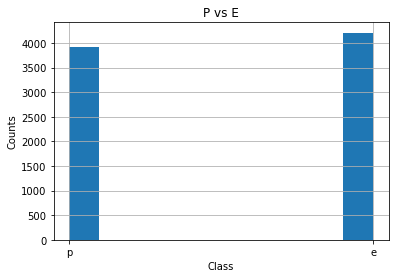

In [198]:
msr['class'].hist(grid=True) # Example of univariate analysis
plt.title('P vs E')
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

In [199]:
# Now Checking Null Values in dataset
msr.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

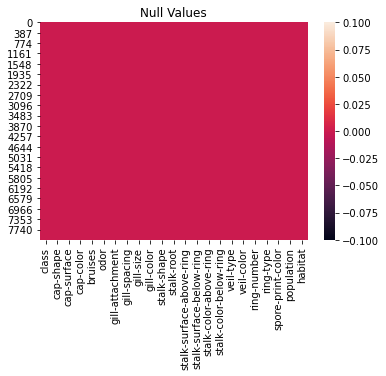

In [200]:
sns.heatmap(msr.isnull())
plt.title("Null Values")
plt.show()

As per above result we can see that there is no null values exist in this dataset.

In [201]:
# Checking dulicate values in dataset
msr.duplicated().sum()

0

# Label Encoding

As we saw above that, our columns have string or categorical values. We can now use LabelEncoder to convert categorical values to ordinal.


In [202]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in msr.columns:
    msr[column] = le.fit_transform(msr[column])

# Checking the dataset again

In [203]:

msr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now we see that all the column values are converted to ordinal and there are no categorical values left!

Also, the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [204]:
msr["veil-type"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [205]:
msr =msr.drop(["veil-type"],axis=1)

# Checking Correlation

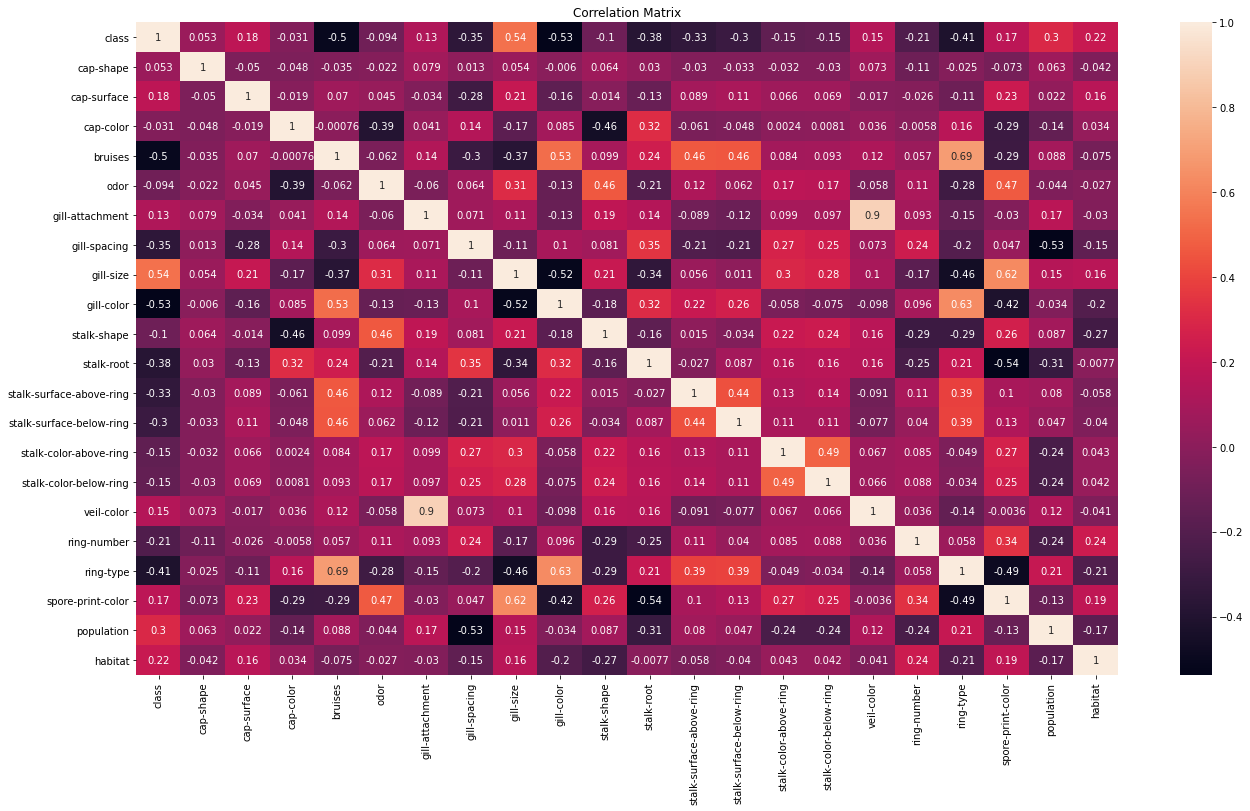

In [206]:
corr_mat=msr.corr() # Example of multivariate analysis

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [207]:
msr.corr(method="pearson", min_periods=20)["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

Obtaining the correlation between the calss and each of the other variables.
As we can see here that "gill-size" is highly correlated with "class" and "gill-color".is least correlated with "class". 

In [208]:
msr[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


# Statistical Summary after

In [209]:
msr.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Plotting Scatterplot 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


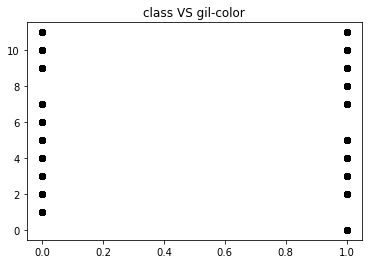

In [210]:
plt.scatter(msr["class"],msr["gill-color"],alpha=0.5, c=(0,0,0)) # Example of Bivriate analysis
plt.title("class VS gil-color")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


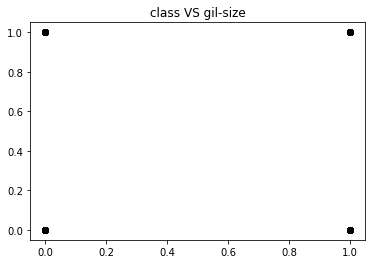

In [211]:
plt.scatter(msr["class"],msr["gill-size"],alpha=0.5, c=(0,0,0)) # Example of Bivriate analysis
plt.title("class VS gil-size")
plt.show()

# Plotting Pairplot of the class versues other some columns.

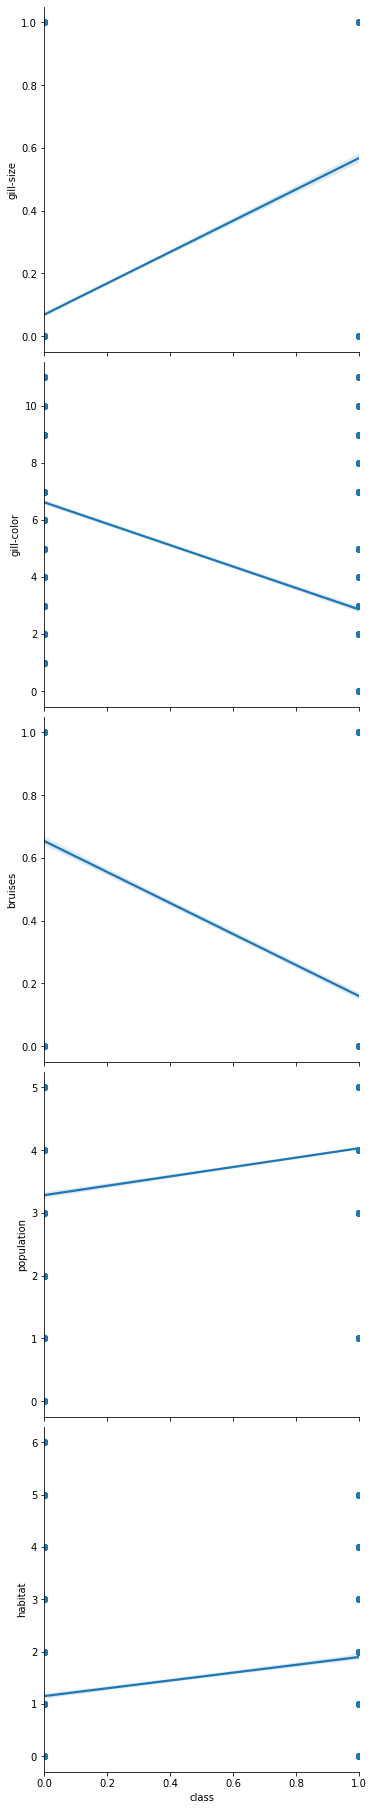

In [212]:
sns.pairplot(data=msr, kind='reg', size = 5,
                  x_vars=['class'],
                  y_vars=['gill-size', 'gill-color','bruises', 'population','habitat'])

# Now plotting outliers

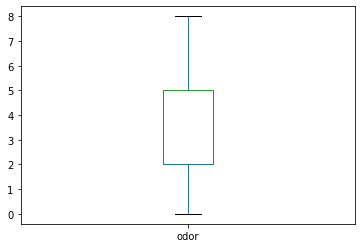

In [213]:
msr["odor"].plot.box()

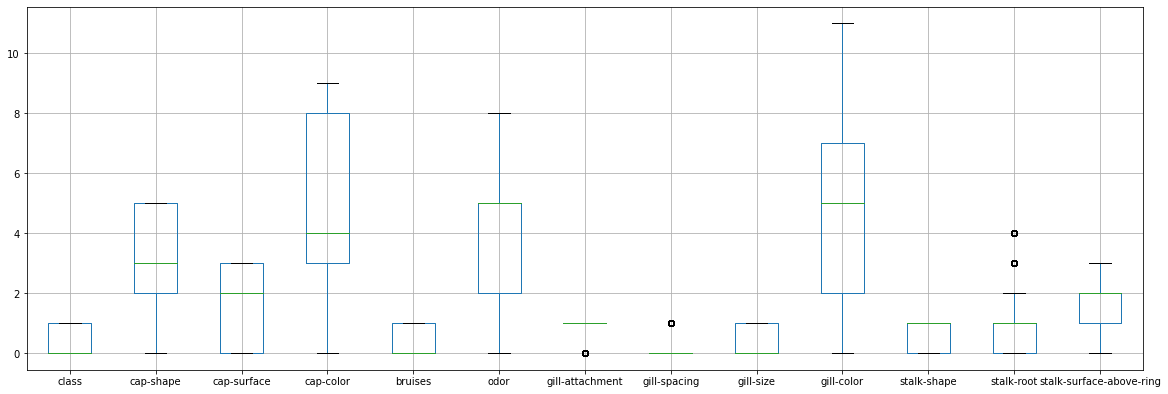

In [214]:
# Plotting boxplot for first 13 columns
msr.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

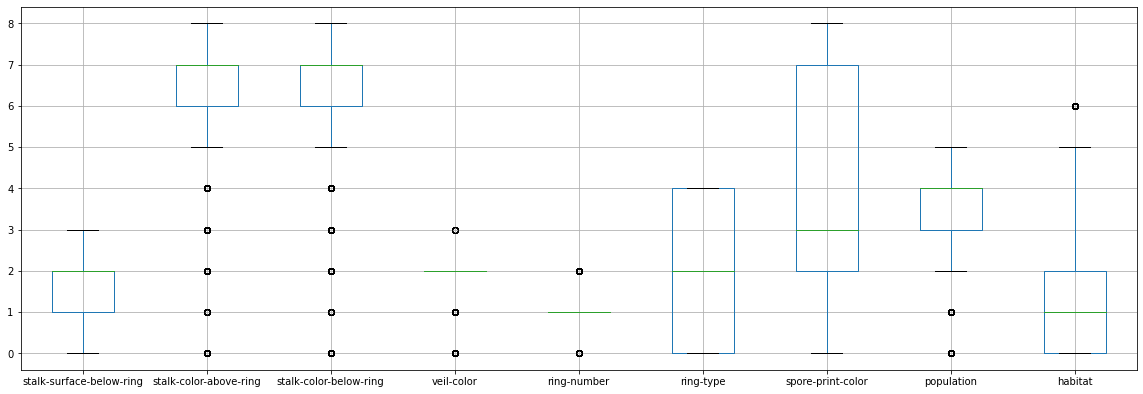

In [215]:
# Plotting boxplot rest columns
msr.iloc[:,13:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As we can see there are outliers in this dataset.

# Removing Outliers

In [216]:
from scipy.stats import zscore
z=np.abs(zscore(msr))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [217]:
threshold=3
print(np.where(z>1))

(array([   0,    0,    0, ..., 8123, 8123, 8123], dtype=int64), array([ 0,  1,  4, ..., 11, 16, 20], dtype=int64))


# To check distribution of skewness

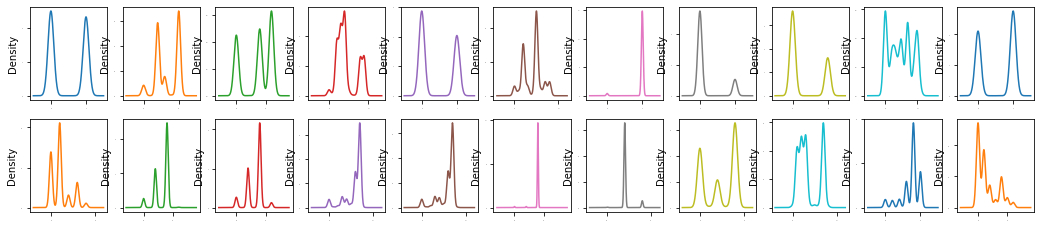

In [218]:
# multivariate analysis

msr.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

As we can see here there are skewness in multiple variables in this dataset.

# Spliting the independent and target variable into x and y

In [219]:
# Splitting the independent and target variables into x and y

x= msr.drop("class", axis=1)
y= msr['class']

In [220]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [221]:
y.skew()

0.0719455344548018

# Removing Skewness

In [222]:
from sklearn.preprocessing import power_transform
msr_new=power_transform(x)

msr_new=pd.DataFrame(msr_new,columns=x.columns)

In [223]:
msr_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

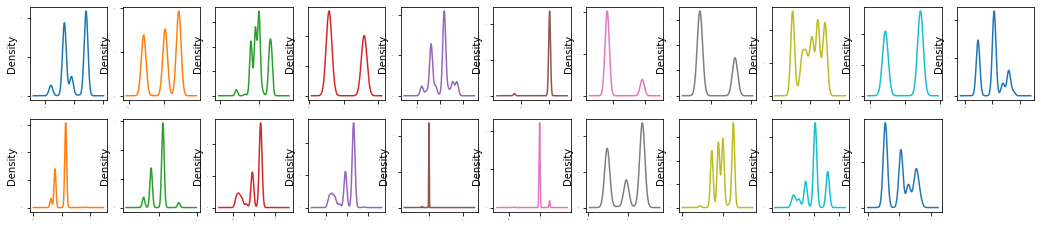

In [224]:
# multivariate analysis

msr_new.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

# Finding Best Random State

Here we are going to use Logistic Regression because it can be used for classification problem also if it has binary or having only two classes. If it has three or more than three classes we can not use Logistic Regression, we should go for other classification classifier algorithm like RandomFOrest Classifier etc.  

In [225]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.9585726004922067 on Random_state 21


We have found best random_state values as 21. We will create our train_test split using this random_state(137).

# Creating Train_Test_SPlit

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=21)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (5686, 21)
x_test (2438, 21)
y_train (5686,)
y_test (2438,)


# Classification Method

In [227]:
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


0.9585726004922067
[[1217   51]
 [  50 1120]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1268
           1       0.96      0.96      0.96      1170

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [228]:
from sklearn.tree import DecisionTreeClassifier

DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddtc=DTC.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [229]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrdf=rf.predict(x_test)
print(accuracy_score(y_test,predrdf))
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [230]:
from sklearn.svm import SVC

SVC= SVC()
SVC.fit(x_train,y_train)
predsvc=SVC.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9897456931911403
[[1264    4]
 [  21 1149]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1268
           1       1.00      0.98      0.99      1170

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



We are getting highest accuracy with DecisionTreeClassifier(100%) and RandomForestClassifier(100%) but it can be due to overfitting also so we will check cross validation score.

# Cross Validation

In [231]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y, cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.8397181508147025


In [232]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(DTC,x,y, cv=5)
print("Cross validation score of DecisionTreeCLassifier model:",scr.mean())

Cross validation score of DecisionTreeCLassifier model: 0.9261229253505115


In [233]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y, cv=5)
print("Cross validation score of RandomForestClassifier model:",scr.mean())

Cross validation score of RandomForestClassifier model: 0.8923839333080712


In [234]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(SVC,x,y, cv=5)
print("Cross validation score of SVC model:",scr.mean())

Cross validation score of SVC model: 0.8420306934444864


Minimum difference in accuracy and cross  validation score is for DecisionTreeClassifier (9). So this is our best model.

# Hyper Parameter Tunning

In [235]:
from sklearn.model_selection import GridSearchCV

In [236]:
# Creatring parameter to pass in GridSearchCV

parameters= {'max_depth': np.arange(2,20),
            'criterion':['gini','entropy']}

In [237]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [238]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [239]:
GCV.best_params_  # Printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8}

In [240]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [241]:
accuracy_score(y_test,GCV_pred)

1.0

# Saving the best model now

In [242]:
import joblib
joblib.dump(GCV.best_estimator_,"MashrromsModelDTC.pkl")


['MashrromsModelDTC.pkl']